## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import config1
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import pickle
import json

import warnings
warnings.filterwarnings('ignore')



## Data Gathering

In [2]:
df = pd.read_csv(config1.CSV_FILE_PATH)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [3]:
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
df['Glucose']

0      148
1       85
2      183
3      150
4      150
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64

In [5]:
df['BloodPressure']

0      50
1      66
2      64
3      66
4      40
       ..
763    76
764    70
765    72
766    60
767    70
Name: BloodPressure, Length: 768, dtype: int64

In [6]:
df['SkinThickness']

0      35
1      29
2       0
3      23
4      35
       ..
763    48
764    27
765    23
766     0
767    31
Name: SkinThickness, Length: 768, dtype: int64

In [7]:
df['Insulin']

0        0
1        0
2        0
3       94
4      168
      ... 
763    180
764      0
765    112
766      0
767      0
Name: Insulin, Length: 768, dtype: int64

In [8]:
df['BMI']

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

In [9]:
df['DiabetesPedigreeFunction']

0      0.627
1      0.351
2      0.672
3      0.167
4      2.288
       ...  
763    0.171
764    0.340
765    0.245
766    0.349
767    0.315
Name: DiabetesPedigreeFunction, Length: 768, dtype: float64

In [10]:
df['Age']

0      50
1      31
2      52
3      21
4      33
       ..
763    63
764    27
765    30
766    47
767    23
Name: Age, Length: 768, dtype: int64

In [11]:
df['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [12]:
x = df.drop("Outcome", axis=1)
y = df.Outcome

## Scaling

In [13]:
x = df.drop('Outcome',axis =1)

std_scaler2 = StandardScaler() # Xmean and Xstd
array1 = std_scaler2.fit_transform(x) # fit + tranform
std_dfx = pd.DataFrame(array1, columns=x.columns)
std_dfx

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.845787,-0.985618,0.907270,-0.692891,0.204013,0.468492,1.426022
1,-1.136319,-0.158966,0.530902,-0.692891,-0.684422,-0.365061,-0.190927
2,1.946957,-0.262298,-1.288212,-0.692891,-1.103255,0.604397,1.596227
3,0.908711,-0.158966,0.154533,0.123302,-0.494043,-0.920763,-1.041953
4,0.908711,-1.502276,0.907270,0.765836,1.409746,5.484909,-0.020722
...,...,...,...,...,...,...,...
763,-0.632927,0.357691,1.722735,0.870031,0.115169,-0.908682,2.532356
764,0.027775,0.047697,0.405445,-0.692891,0.610154,-0.398282,-0.531337
765,-0.003687,0.151028,0.154533,0.279594,-0.735190,-0.685193,-0.276029
766,0.153623,-0.468961,-1.288212,-0.692891,-0.240205,-0.371101,1.170715


## EDA

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB




## Model Training

In [15]:
x_train,x_test, y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=80, stratify=y)

In [16]:
log_reg_model = LogisticRegression()
log_reg_model.fit(x_train , y_train)

LogisticRegression()

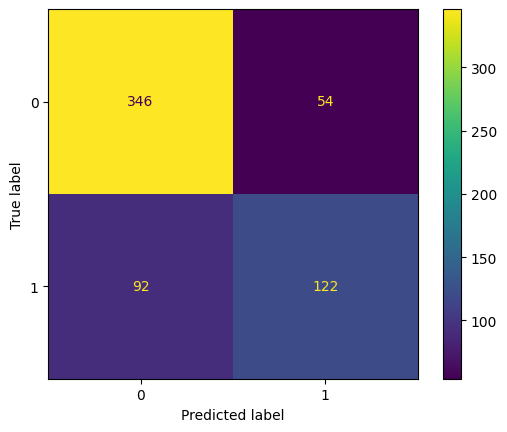

In [17]:
log_reg_model.score(x_train, y_train)
plot_confusion_matrix(log_reg_model , x_train, y_train)

<Figure size 500x300 with 0 Axes>

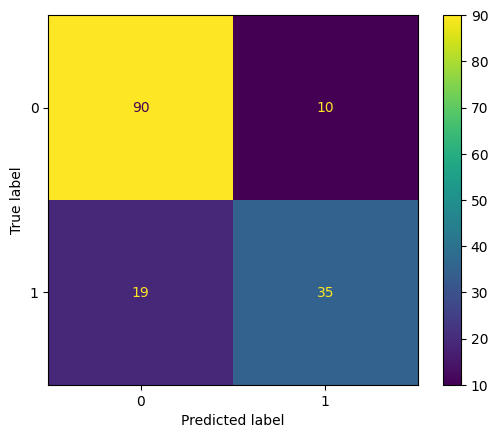

In [18]:
plt.figure(figsize=(5,3))
plot_confusion_matrix(log_reg_model,x_test,y_test)
plt.savefig('Cnf_matrix_test.png')

In [19]:
y_pred_train = log_reg_model.predict(x_train)

In [20]:
clf_report = classification_report(y_train, y_pred_train)
print(clf_report)

              precision    recall  f1-score   support

           0       0.79      0.86      0.83       400
           1       0.69      0.57      0.63       214

    accuracy                           0.76       614
   macro avg       0.74      0.72      0.73       614
weighted avg       0.76      0.76      0.76       614



In [21]:
log_reg_model.score(x_train, y_train)

0.762214983713355

## Save Model

In [22]:
with open(config1.MODEL_FILE_PATH,'wb') as f:
    pickle.dump(log_reg_model, f)

In [23]:
log_reg_model.n_features_in_

7

In [24]:
np.zeros(7)

array([0., 0., 0., 0., 0., 0., 0.])

In [26]:
with open(config1.SCALER_PATH,"wb") as f:
    pickle.dump(std_scaler2,f)